# Bioinformatics Introduction to Coding

## Programming Basics 6

### Last lesson recap:

- Procedural Programming vs. Object Orientation
- Classes and Objects: Blueprints and Buildings
- Sequence Exercise

### Coming up this lesson:

- general file input and text parsing
- file output
- pandas and the data frame
- fasta parsing exercise

## The Home Stretch - Working with Files
Congratulations, you've made it to your last intro python notebook! Let's dive into it.

You've learned about how to interact with data using code, but where does the data come from? Unless you're manually inputting values from decades-old notebooks (which does occasionally happen), the data you'll need to analyze are probably already stored in some form of electronic file. If you're very, very lucky the data will even be formatted in a standard way and somebody has already built the software necessary to **parse** the data from the file and store it into a convenient data structure for your science-y purposes. In this last series of exercises we're gonna work through some common ways to approach File I/O (that's input/output).

## File Input Basics

The first step that needs to happen – no matter what you want to do with a file – is opening a **file** object. This object just serves as a **stream** or link between your program and wherever the information in the file is stored on your computer. It doesn't do much of anything by itself, but it's the conduit which will let us do some cool things. The function python uses to make our file object is pretty straightforward.

In [ ]:
# let's call our variable name for our file something nice and descriptive
# the name of the file we want to connect with; easiest if it's in the same directory where you run your notebook from
# last we just want to read 'r' and not write 'w' to our file
input_file = open('hrdata.txt', 'r')

As you've hopefully learned to expect by now, just because we asked the computer to do something doesn't mean we necessarily see output. Our file object needs some extra instructions before we'll start seeing text stored in the file, and there are a number of file methods that let us look at that text.

In [ ]:
#the readline method grabs all the characters from just one line of text
first_line = input_file.readline()
print(first_line)

#the file object keeps track of the last line accessed, so if we do this again we get a new line
second_line = input_file.readline()
print(second_line)


# go ahead and rerun this code a few times; what happens to the output? Why?

Trying to read in all the data by specifying each line is lame. Don't repeat yourself when the computer can do the repeating for you!

In [ ]:
# as you might have deduced, we need to reset the line pointer associated with our inputFile
input_file.seek(0, 0)

#readlines method will grab everything and once and let us store it in a list
lines = input_file.readlines()
print(lines)

We've made some progress, but this isn't really an ideal way to look at text. Look at all of those gross special characters, it's practically unreadable! If only there were a way for us to use what we've learned about programming control structures to process the lines....oh wait, there is.

In [ ]:
# re-set our file, again
input_file.seek(0,0)

# make an empty list to put info in later
employees = []

# let's use a loop to go through, line by line
for line in input_file:
    # inside our loop we can do thing to each line!
    # printing the line is more readable than printing a list showing all the special characters
    # much improve, so readable
    print(line)
    #let's get rid of new line characters
    modline = line.strip("\n")
    #then split up the line by tabs
    info = modline.split("\t")
    #we know that the employee name is always the second item, or the 1 index position
    employees.append(info[1])

# by the time we're done looping we'll have a list of all our employee names
# let's print it to check it out!
print(employees[1:])

#you should close file objects once you're done with them, otherwise occasionally goofy computer memory things can happen
input_file.close()

## File Output

Writing information to a file isn't hard. All we need to do is open a file stream specifically for output and tell it what to write! Also this demonstrates the use of the `with` statement. `with` will automatically close any resources (this includes files) when the indented block ends. Generally, you will want to use `with` blocks when reading and writing files so you don't have to remember to close them manually.

In [ ]:
#unscrupulous HR worker is going to violate some privacy laws by saving employee info in a new file
#make our file object for output

with open("employee_names.txt", "w") as output_file:  # output_file is now a variable containing the file object
    # Loop over employee info and write into the new file
    for employee in employees[1:]:
        output_file.write(employee)

# no need for output_file.close() because of the with statement!

## Pandas and Data Frames

One of the most well-known Python data science packages that helps us manage data input is called...Pandas!

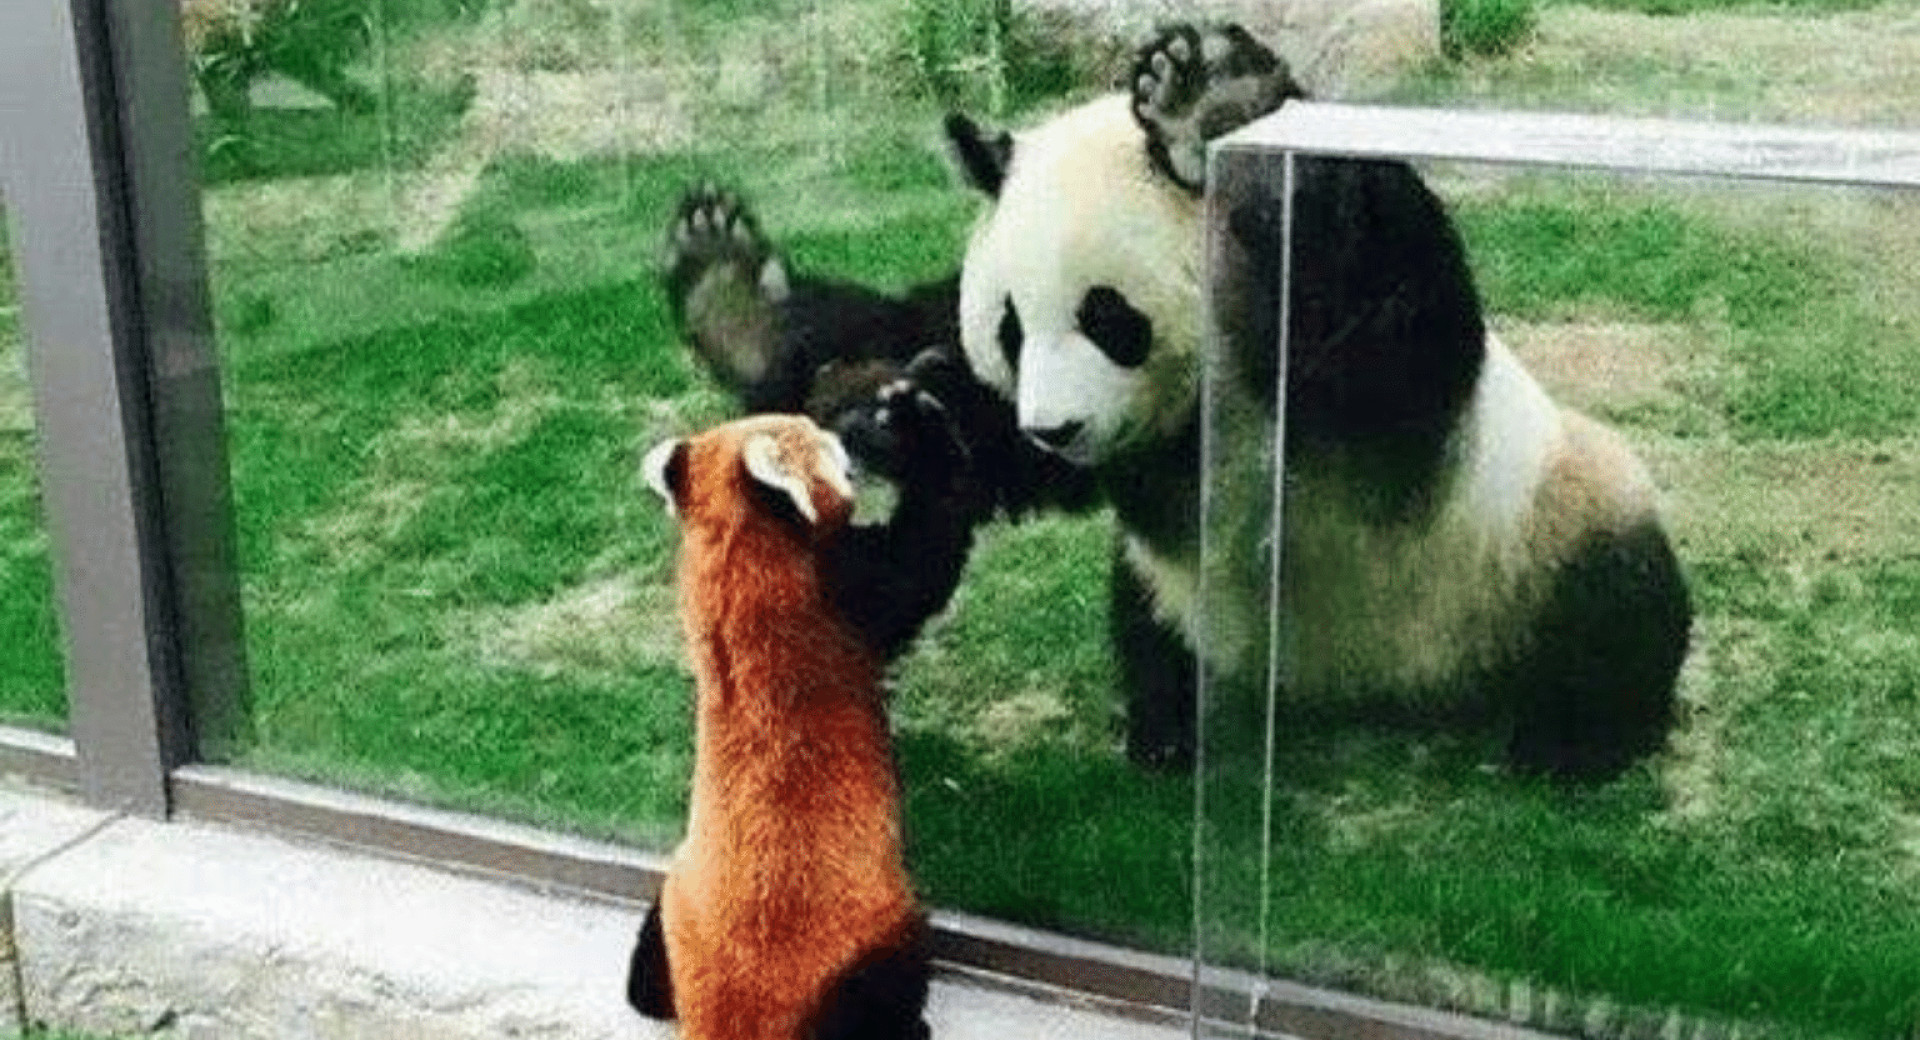

What does Pandas do?? It more or less turns Python into R, the next coding language you'll be learning about. Delving deep into Pandas functionality will make more sense after you build those skill sets a bit, but there are two useful things to touch on now regarding file input.

First is a specialty data structure, called the **data frame**. A data frame is just a matrix, with labeled columns so you can work with subsets of your data easily. It is essentially analogous to an R data.frame, if you're familiar with those. The second thing is a specific function which parses **comma separated value (CSV)** files and lets you stick them into a data frame. If you've installed Anaconda and are using it's bundled Python interpreter, you should already have Pandas installed, but we'll touch on it once we've done more work in R. I just want to let you know that not all file parsing is as difficult as what you're about to try!

## File Parsing Exercise

So you have a fasta file containing some genetic information called `opsins.fa`. Don't know what a fasta file is? Look it up, because you'll need to know. I want YOU to write your own file parser that reads all the lines of the file, but saves the header information to a list and writes it to a new file. Good luck :)

In [ ]:
# make a file object so you'll be able to read in the data

# loop over all the lines of text in the file

# use some sort of conditional to decide what is header info and what is sequence

# write the header info to a new file

# close your files when you're done if you didn't use with statements